In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

C:\Users\Chaithra M\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Load the CSV files
train_data = pd.read_csv(r"C:\Users\Chaithra M\Downloads\mnist_train\mnist_train.csv")
test_data = pd.read_csv(r"C:\Users\Chaithra M\Downloads\mnist_test\mnist_test.csv")

In [3]:
# Separate features and labels
x_train = train_data.drop('label', axis=1).values
y_train = train_data['label'].values
x_test = test_data.drop('label', axis=1).values
y_test = test_data['label'].values

# Normalize the pixel values to range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [4]:
# Split training data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=42)


In [5]:
# Define the MLP model
model = Sequential([
    Dense(512, activation='relu', input_shape=(784,)),  # 28*28 = 784
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

C:\Users\Chaithra M\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Print the model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_data=(x_val, y_val))

Epoch 1/5
329/329 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.8519 - loss: 0.5103 - val_accuracy: 0.9604 - val_loss: 0.1339
Epoch 2/5
329/329 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9688 - loss: 0.1076 - val_accuracy: 0.9655 - val_loss: 0.1094
Epoch 3/5
329/329 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9796 - loss: 0.0649 - val_accuracy: 0.9732 - val_loss: 0.0929
Epoch 4/5
329/329 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9865 - loss: 0.0419 - val_accuracy: 0.9624 - val_loss: 0.1420
Epoch 5/5
329/329 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9876 - loss: 0.0365 - val_accuracy: 0.9718 - val_loss: 0.0998


In [8]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9705 - loss: 0.1015
Test accuracy: 97.44%


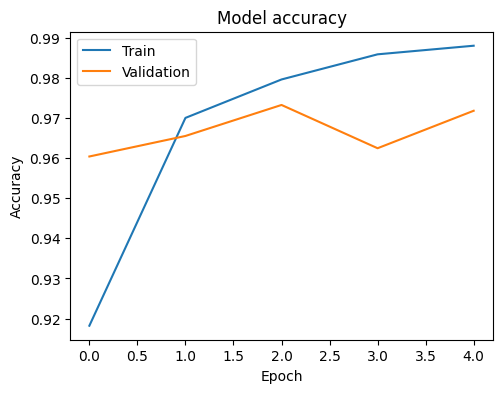

In [9]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

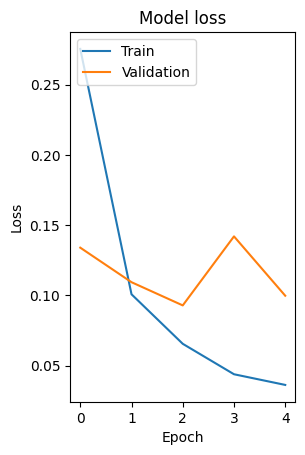

In [10]:
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [11]:
# Save the trained model
model.save('mlp_baseline_model.h5')